In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Suicidesindia2001-2012.csv')

In [3]:
D = data.groupby('Year').Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [4]:
x = D.index.values
y = D.values

In [5]:
x = D.index.values.reshape(-1,1)
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [6]:
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [9]:
regressor.predict([[2020]])

array([1219499.])

In [10]:
Yp=regressor.predict(X_test)
Yp

array([1062991., 1219499., 1023137.])

In [12]:
print(np.concatenate((Yp.reshape(len(Yp),1), y_test.reshape(len(y_test),1)),1))

[[1062991. 1103667.]
 [1219499. 1189068.]
 [1023137. 1025201.]]


In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,Yp)

0.8075925311114314

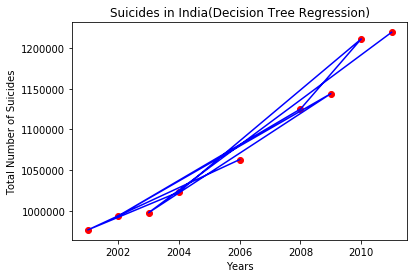

In [14]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Suicides in India(Decision Tree Regression)')
plt.xlabel('Years')
plt.ylabel("Total Number of Suicides")
plt.show()

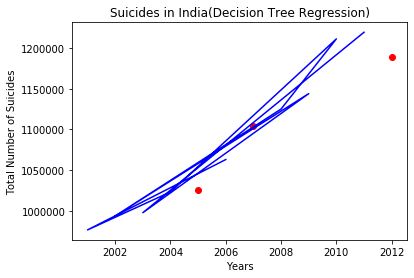

In [15]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Suicides in India(Decision Tree Regression)')
plt.xlabel('Years')
plt.ylabel("Total Number of Suicides")
plt.show()